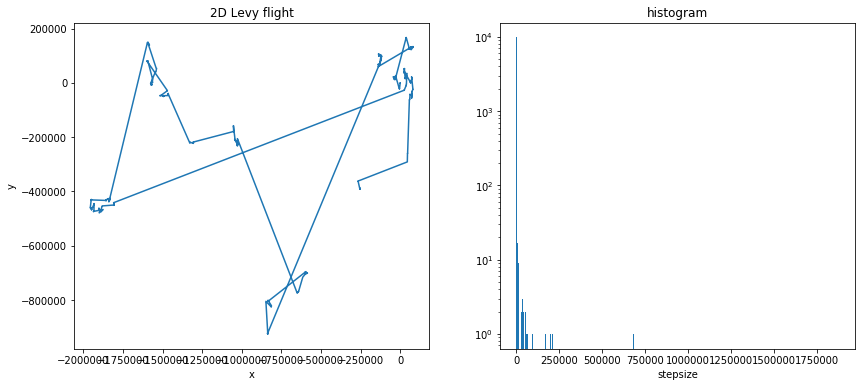

In [27]:
import numpy as np 
from scipy.stats import uniform
from scipy.stats import levy
import matplotlib.pyplot as plt
%matplotlib inline
def levy_walk( n ):

    # uniformly distributed angles
    angle = uniform.rvs( size=(n,), loc=.0, scale=2.*np.pi )

    # levy distributed step length
    r = levy.rvs( size=n )

    # x and y coordinates (position added to previous coordinate --> cum. sum)
    x = np.cumsum( r * np.cos(angle) )
    y = np.cumsum( r * np.sin(angle) )
    #print "(",x,",",y,")"
    return np.array( (x, y, r, angle) )

# number of steps to simulate
n = 10000

# get levy walk (strictly speaking, it seems to be a flight)
foo = levy_walk( n )

# initialize figure
fig = plt.figure( figsize=(14,6) )

# plot 2D random walk with Levy stepsize
ax1 = fig.add_subplot( 1,2,1 )
ax1.plot( foo[0,:], foo[1,:] )
ax1.set_xlabel( 'x' )
ax1.set_ylabel( 'y' )
ax1.set_title( '2D Levy flight' )

# plot histogram
ax2 = fig.add_subplot( 1,2,2 )
num_bins = n/10
ax2.hist( foo[2,:], bins=n/10 )
ax2.set_yscale( 'log' )
ax2.set_xlabel( 'stepsize' )
ax2.set_title( 'histogram' )

plt.show()